In [ ]:
https://drive.google.com/file/d/1cThhgrjBGVIe6jxvUzWqnqJW4KweY4JW/view?usp=drive_link

In [24]:
!gdown 1cThhgrjBGVIe6jxvUzWqnqJW4KweY4JW

Downloading...
From: https://drive.google.com/uc?id=1cThhgrjBGVIe6jxvUzWqnqJW4KweY4JW
To: /content/exercise.csv
100% 677k/677k [00:00<00:00, 76.4MB/s]


In [31]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [32]:
df1=pd.read_csv('/content/exercise.csv')   #Loading dataset1 named exercise

In [ ]:
https://drive.google.com/file/d/1g-vShUdYJZthqyWbPId3rDMlW5gVFt-_/view?usp=drive_link

In [33]:
!gdown 1g-vShUdYJZthqyWbPId3rDMlW5gVFt-_

Downloading...
From: https://drive.google.com/uc?id=1g-vShUdYJZthqyWbPId3rDMlW5gVFt-_
To: /content/calories.csv
100% 230k/230k [00:00<00:00, 68.4MB/s]


In [34]:
df2=pd.read_csv('/content/calories.csv')  #Loading dataset1 named calories

In [36]:
df = pd.merge(df1, df2, how='outer')
print(df)

#Merging the two datasets using panda

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      10001159  female   67   176.0    74.0      12.0       103.0       39.6   
1      10001607  female   34   178.0    79.0      19.0        96.0       40.6   
2      10005485  female   38   178.0    77.0      14.0        82.0       40.5   
3      10005630  female   39   169.0    66.0       8.0        90.0       39.6   
4      10006441    male   23   169.0    73.0      25.0       102.0       40.7   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  19999044  female   25   169.0    66.0      22.0       105.0       40.6   
14996  19999086  female   31   170.0    69.0       9.0        93.0       39.8   
14997  19999257    male   21   176.0    75.0      19.0       109.0       40.5   
14998  19999394  female   36   152.0    54.0      10.0        86.0       39.7   
14999  19999647    male   29   164.0    67.0      30.0       102.0       41.2   

       Calories  
0        

In [37]:
df.info()  #checking the datatypes of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [38]:
df.head()  #checking the first five rows of the dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,female,67,176.0,74.0,12.0,103.0,39.6,76.0
1,10001607,female,34,178.0,79.0,19.0,96.0,40.6,93.0
2,10005485,female,38,178.0,77.0,14.0,82.0,40.5,49.0
3,10005630,female,39,169.0,66.0,8.0,90.0,39.6,36.0
4,10006441,male,23,169.0,73.0,25.0,102.0,40.7,122.0


In [40]:
df.shape  #checking the dimensions of the dataset

(15000, 9)

In [41]:
df.describe()   #checking the descriptive statistical measures of the data

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Exploratory Data Analysis**

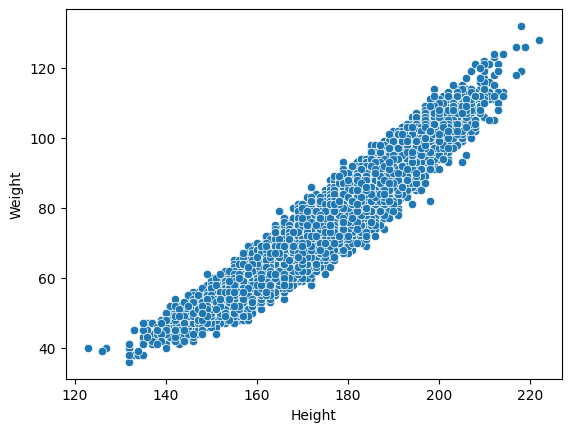

In [42]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()    #plotting a scatterplot of height vs weight to check linearity

We have a kind of linear relationship between these two features which is quite obvious.

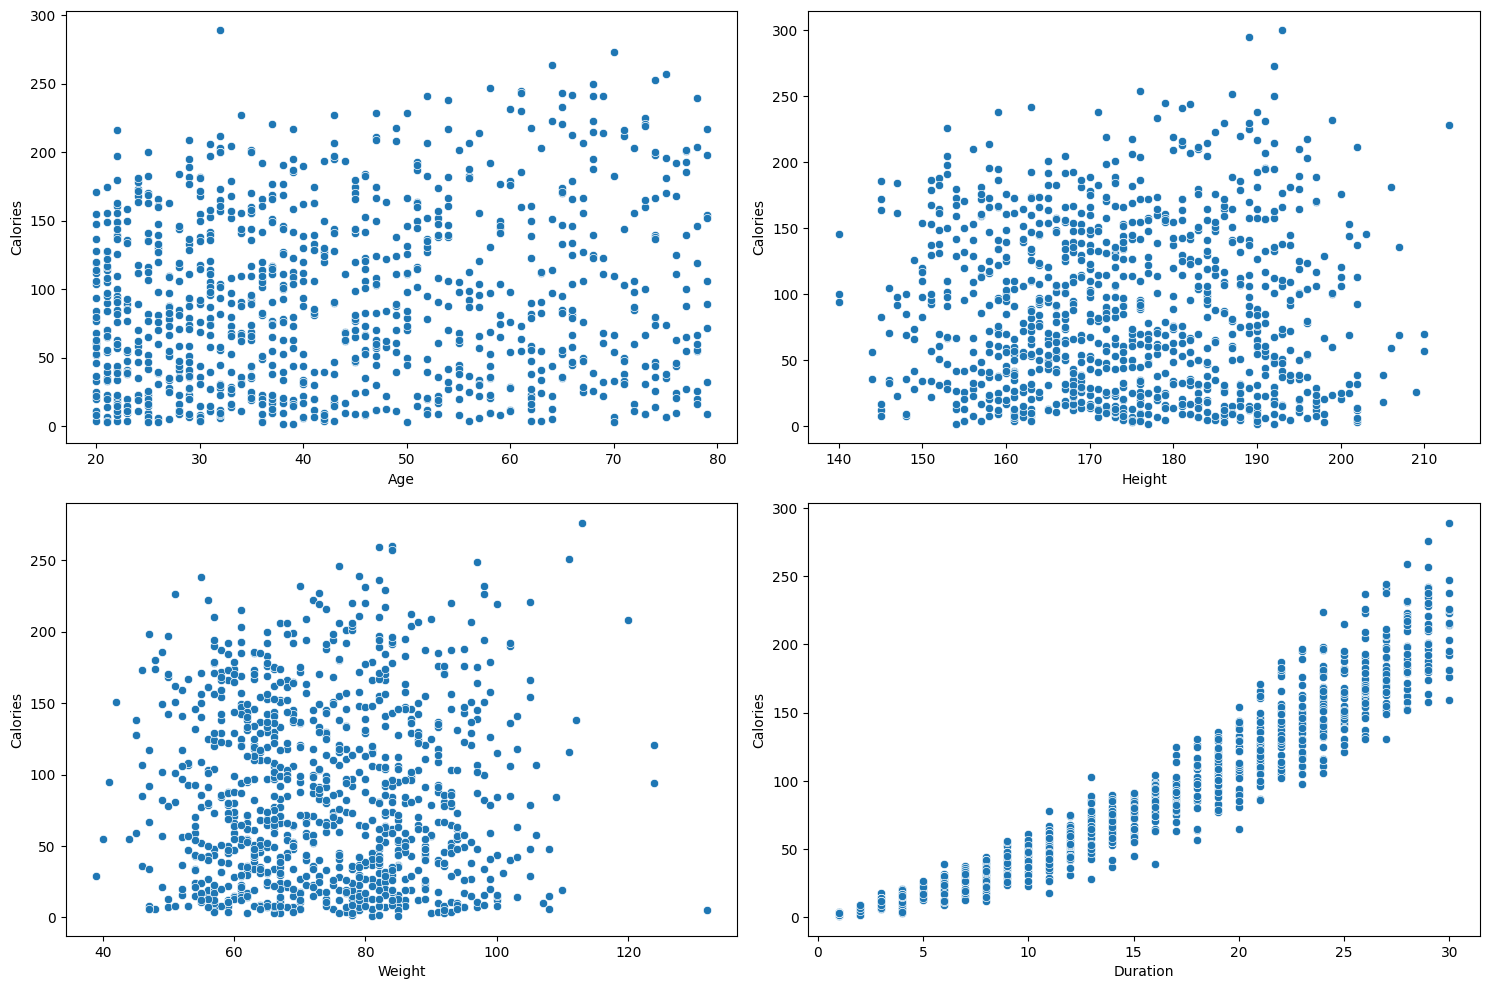

In [43]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()   #understanding the other variables

As expected higher is the duration of the workout higher will be the calories burnt. But except for that, we cannot observe any such relation between calories burnt and height or weight features.



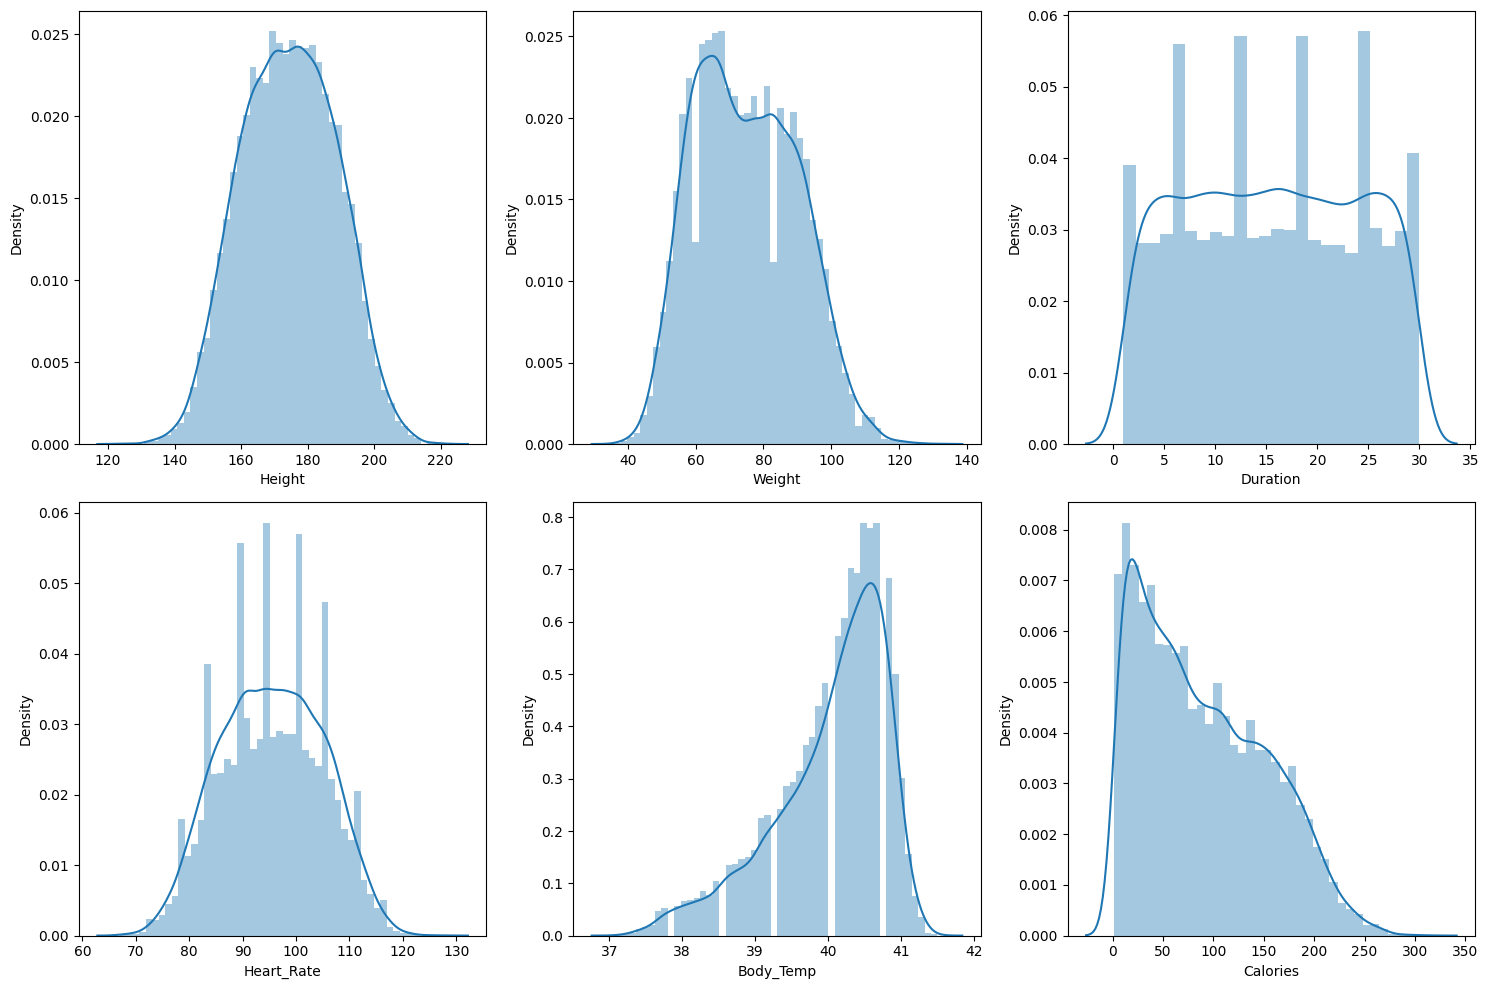

In [44]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

#Checking the normality

The distribution of the continuous features follows close to normal distribution except for some features like Body_Temp and Calories.

In [45]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()   #Converting categorical variables into numerical variables for modelling

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,1,67,176.0,74.0,12.0,103.0,39.6,76.0
1,10001607,1,34,178.0,79.0,19.0,96.0,40.6,93.0
2,10005485,1,38,178.0,77.0,14.0,82.0,40.5,49.0
3,10005630,1,39,169.0,66.0,8.0,90.0,39.6,36.0
4,10006441,0,23,169.0,73.0,25.0,102.0,40.7,122.0


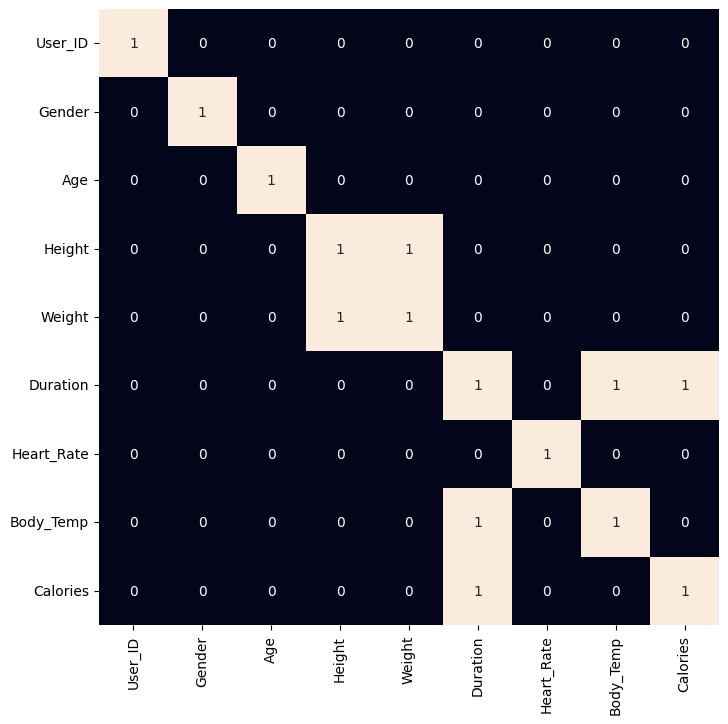

In [46]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

Here we have a serious problem of data leakage as there is a feature that is highly correlated with the target column which is calories.

In [47]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

**Model Training**

Now we will separate the features and target variables and split them into training and testing data by using which we will select the model which is performing best on the validation data.

In [48]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_test,\
    y_train, y_test = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_test.shape


((13500, 5), (1500, 5))

Let’s normalize the data to obtain stable and fast training.

In [49]:
scaler = StandardScaler()   # Normalizing the features for stable and fast training.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This will ensure all of our X data is between 0 (min) and 1 (max). We will use fit_transform() on the train data first, then fit on the test data. If we don't do this step after splitting, we will have data leakage.

Now let’s train some state-of-the-art machine learning models and compare them which fit better with our data.

In [50]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(y_train, train_preds))

    val_preds = models[i].predict(X_test)
    print('Validation Error : ', mae(y_test, val_preds))
    print()


LinearRegression() : 
Training Error :  17.92326714155359
Validation Error :  17.98709313328683

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  7.75191154980825
Validation Error :  10.332014002025128

Lasso() : 
Training Error :  17.939219940830903
Validation Error :  18.0138648

Out of all the above models, we have trained RandomForestRegressor and the XGB model’s performance is almost the same as their MAE for the validation data is same.